In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

from keras import models, layers
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 데이터 불러오기

In [3]:
df = datasets.load_iris()

In [4]:
X = df['data']
Y = df['target']

## 데이터 전처리

MinMaxScaler로 데이터 스케일링

In [5]:
scaler = MinMaxScaler() 
scaler.fit(X) 
X = scaler.transform(X)

LabelEncoder로 target 전처리

In [6]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# 타겟 값 one-hot encoding
Y = to_categorical(Y)

### train test split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

## 모델 구축

In [9]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### 모델 학습

In [10]:
model = build_model()
history = model.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 3s 5ms/step - loss: 1.0704 - accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0550 - accuracy: 0.4400
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0327 - accuracy: 0.4800
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0010 - accuracy: 0.5600
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9815 - accuracy: 0.5467
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9661 - accuracy: 0.5733
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9353 - accuracy: 0.6400
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9067 - accuracy: 0.6000
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9118 - accuracy: 0.6533
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8674 - accuracy: 0.6667
Epoch 11/100
10/10 [=

### 성능 시각화

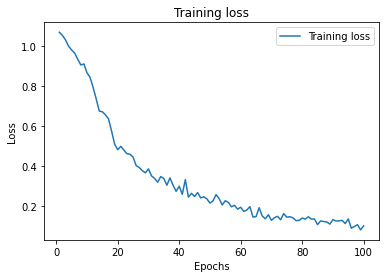

In [11]:
# loss 시각화
loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

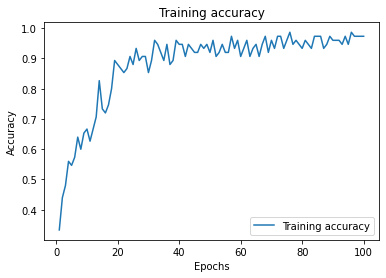

In [12]:
# accuracy 시각화
accuracy = history.history['accuracy']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, label='Training accuracy')
plt.title("Training accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 모델 평가

In [13]:
test_CE_score = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.9600
